# Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loading the dataset

In [2]:
data = pd.read_excel("loan_dataset.xlsx")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# data preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.shape

(614, 13)

In [5]:
data = data.drop(columns=['Loan_ID'])

In [6]:
# checking the null values

data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

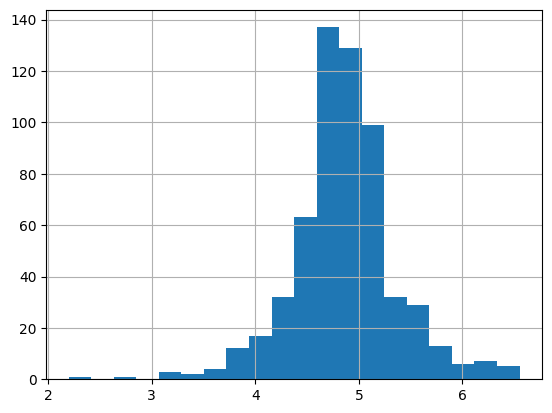

In [7]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])
data['LoanAmount_log'].hist(bins=20)

<AxesSubplot:>

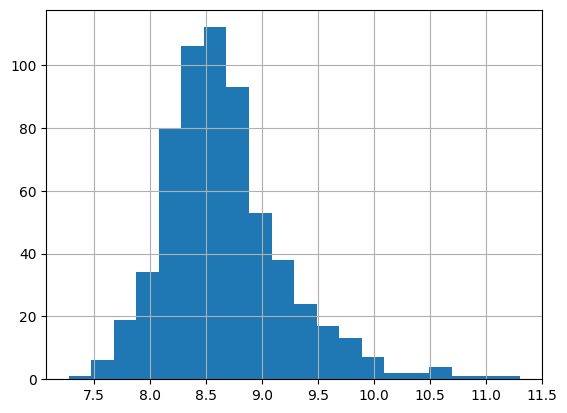

In [8]:
data['TotalIncome'] = data['ApplicantIncome']+data['CoapplicantIncome']
data['TotalIncome_log'] = np.log(data['TotalIncome'])
data['TotalIncome_log'].hist(bins=20)

In [9]:
# filling the null values

data['Gender'].fillna(data['Gender'].mode()[0], inplace =True)
data['Married'].fillna(data['Married'].mode()[0], inplace =True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace =True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace =True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace =True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace =True)

data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())
data.LoanAmount_log = data.LoanAmount_log.fillna(data.LoanAmount_log.mean())

In [10]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

# Data Visualization

number of people who take loan group by gender:
Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

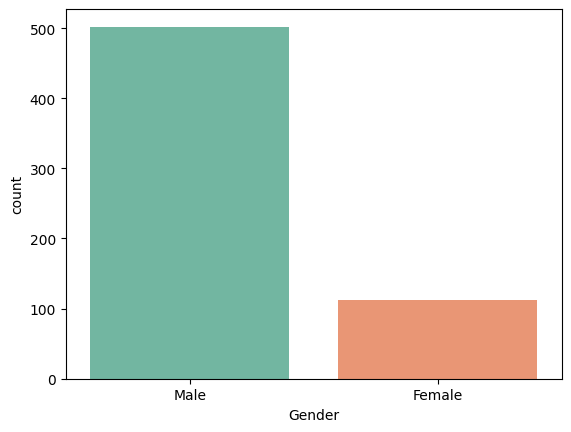

In [11]:
print("number of people who take loan group by gender:")
print(data['Gender'].value_counts())
sns.countplot(x='Gender', data=data, palette = 'Set2')

number of people who take loan group by Marrital Status:
Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

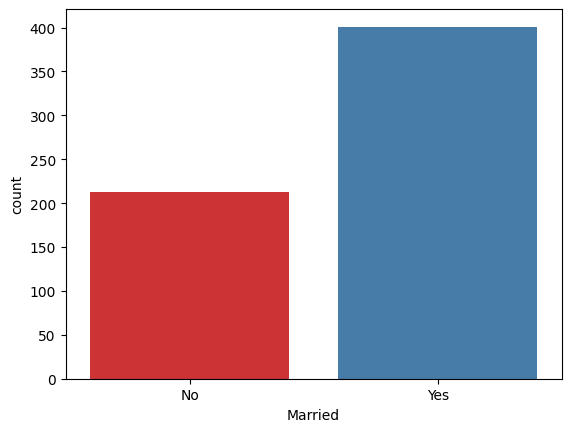

In [12]:
print("number of people who take loan group by Marrital Status:")
print(data['Married'].value_counts())
sns.countplot(x='Married', data=data, palette = 'Set1')

number of people who take loan group by Dependents:
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

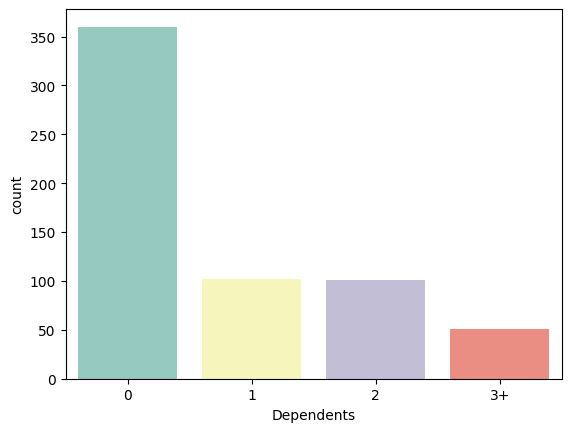

In [13]:
print("number of people who take loan group by Dependents:")
print(data['Dependents'].value_counts())
sns.countplot(x='Dependents', data=data, palette = 'Set3')

number of people who take loan group by Self_Employed:
No     532
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

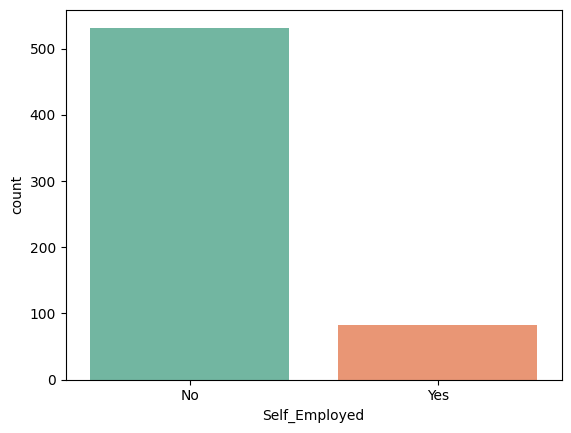

In [14]:
print("number of people who take loan group by Self_Employed:")
print(data['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=data, palette = 'Set2')

number of people who take loan group by Credit_History:
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

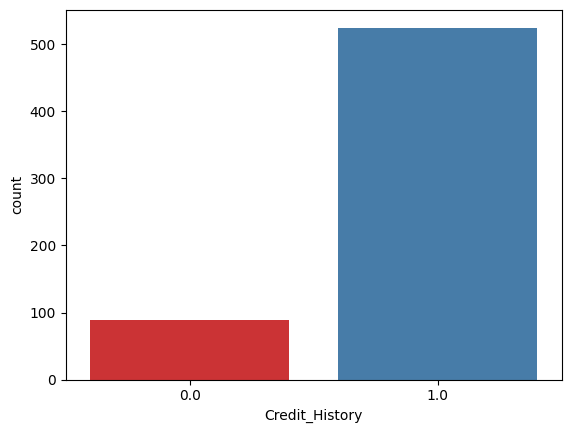

In [15]:
print("number of people who take loan group by Credit_History:")
print(data['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=data, palette = 'Set1')

In [16]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']

In [17]:
# Encoding the categorical variable

data_encoded = pd.get_dummies(data,drop_first=True)
data_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,4.857444,5849.0,8.674026,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,4.852030,6091.0,8.714568,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,4.189655,3000.0,8.006368,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,4.787492,4941.0,8.505323,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,4.948760,6000.0,8.699515,1,0,0,0,0,0,0,0,1,1


In [18]:
data_encoded.shape

(614, 18)

# train_test_split

In [19]:
X = data_encoded.drop(columns='Loan_Status_Y')
y = data_encoded['Loan_Status_Y']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Standard Scaler

In [21]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

# Importing Libraries to build Model

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Random Forest

In [29]:
model = RandomForestClassifier(n_estimators=10)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy score of RandomForest: ", metrics.accuracy_score(y_pred, y_test))

Accuracy score of RandomForest:  0.7235772357723578


# Decision Tree

In [30]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy score of RandomForest: ", metrics.accuracy_score(y_pred, y_test))

Accuracy score of RandomForest:  0.6585365853658537


# Logistic Regression

In [37]:
model_lr = LogisticRegression()
model_lr.fit(x_train,y_train)
y_pred = model_lr.predict(x_test)
print("Accuracy score of RandomForest: ", metrics.accuracy_score(y_pred, y_test))

Accuracy score of RandomForest:  0.8373983739837398
